# Neural networks classification with pytorch

### make classification data

In [215]:
import sklearn

In [216]:
from numpy.random import random_sample
from sklearn.datasets import make_circles

#1000 samples
n_samples = 1000

#create circles
X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state=42)

In [217]:
print(f"First 5 samples of X:  {X[:5]}")
print(f"First 5 samples of y:  {y[:5]}")

First 5 samples of X:  [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:  [1 1 1 1 0]


In [218]:
#make dataframe of circle database
import pandas as pd
circles = pd.DataFrame({"X1":X[:,0],
                       "X2":X[:,1],
                       "label":y})
circles

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


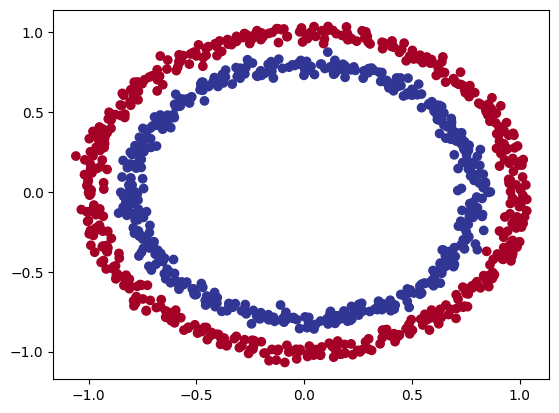

In [219]:
#visualize
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap = plt.cm.RdYlBu)

### 1.1 input and output shapes

In [220]:
X.shape, y.shape

((1000, 2), (1000,))

### 1.2 turn data into tensors and create train and test split

In [221]:
import torch
torch.__version__

'2.9.0+cpu'

In [222]:
from torch import nn, optim

In [223]:
type(X)

numpy.ndarray

In [224]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [225]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [226]:
X.dtype, X.type()

(torch.float32, 'torch.FloatTensor')

In [227]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

In [228]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## building a model
to classify blue and red dots

* setup device agnostic code as in to run code on gpu if available

* construct model

* define a loss function and optimizer

* training and testing loop

In [229]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [230]:
X_train

tensor([[-0.1396,  0.7966],
        [-0.3140,  0.9425],
        [ 0.6390, -0.5092],
        ...,
        [-0.6654, -0.3854],
        [ 0.1889,  0.9760],
        [-0.8401, -0.0955]])

In [231]:
## constructing a model

class classificationModel(nn.Module):
  #subclass nn.Module
  def __init__(self):
    super().__init__()

    #create 2 linear layers
    self.layer1 = nn.Linear(in_features=2, out_features=5)
    self.layer2 = nn.Linear(in_features=5, out_features=1)

    #forward pass
    def forward(self, x):
      return self.layer2(self.layer1(x))
      #x -> layer1 -> layer2 -> output

## instantiate an instance of out model class andsend it target device
model0 = classificationModel().to(device)
model0


classificationModel(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [232]:
device

'cpu'

In [233]:
## lets replicate above model using nn.Sequential

model1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=50),
    nn.BatchNorm1d(50),
    nn.ReLU(),
    nn.Linear(in_features=50, out_features=100),
    nn.BatchNorm1d(100),
    nn.ReLU(),
    nn.Linear(100,50),
    nn.BatchNorm1d(50),
    nn.ReLU(),
    nn.Linear(50,1)
).to(device)

model1

Sequential(
  (0): Linear(in_features=2, out_features=50, bias=True)
  (1): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Linear(in_features=50, out_features=100, bias=True)
  (4): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=50, bias=True)
  (7): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): ReLU()
  (9): Linear(in_features=50, out_features=1, bias=True)
)

In [234]:
## other way
## constructing a model

class classificationModel(nn.Module):
  #subclass nn.Module
  def __init__(self):
    super().__init__()

    #create 2 linear layers
    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features=1)
    )

    #forward pass
    def forward(self, x):
      return two_linear_layers(x)

## instantiate an instance of out model class andsend it target device
model2 = classificationModel().to(device)
model2


classificationModel(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [235]:
model1

Sequential(
  (0): Linear(in_features=2, out_features=50, bias=True)
  (1): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Linear(in_features=50, out_features=100, bias=True)
  (4): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=50, bias=True)
  (7): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): ReLU()
  (9): Linear(in_features=50, out_features=1, bias=True)
)

In [236]:
model1.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386],
                      [-0.6007,  0.5459],
                      [ 0.1177, -0.2296],
                      [ 0.4370,  0.1102],
                      [ 0.5713,  0.0773],
                      [-0.2230,  0.1900],
                      [-0.1918,  0.2976],
                      [ 0.6313,  0.4087],
                      [-0.3091,  0.4082],
                      [ 0.1265,  0.3591],
                      [-0.4310, -0.7000],
                      [-0.2732, -0.5424],
                      [ 0.5802,  0.2037],
                      [ 0.2929,  0.2236],
                      [-0.0123,  0.5534],
                      [-0.5024,  0.0445],
                      [-0.4826,  0.2180],
                      [-0.2435,  0.2167],
                      [-0.1473,  0.5865],
        

In [237]:
with torch.inference_mode():
  untrained_preds = model1(X_test.to(device))
untrained_preds[:10]

tensor([[0.1475],
        [0.1597],
        [0.0720],
        [0.4897],
        [0.4071],
        [0.3478],
        [0.3606],
        [0.4275],
        [0.2481],
        [0.2757]])

## loss function

In [238]:
#to use nn.BCELoss() it requires input gone through sigmoid layer, nn.BCELogitLoss has one in it
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(params=model1.parameters(),lr=0.01)


In [239]:
#calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

## Training model

In [240]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 100

for epoch in range(epochs+1):
  model1.train()

  #forward pass
  y_logits = model1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  #logits -> pred_prob -> pred_class_labels

  # loss = loss_fn(torch.sigmoid(y_logits),y_train) # it it was BCELoss instead BCELogitLoss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward() #backpropogation

  optimizer.step() #gradient descent

  model1.eval()
  with torch.inference_mode():
    test_logits = model1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
    #print epochs
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc:{acc:.2f}% | Test Loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.72869, Acc:49.75% | Test Loss: 0.69612, Test acc: 50.00%
Epoch: 10 | Loss: 0.65758, Acc:60.62% | Test Loss: 0.68875, Test acc: 50.00%
Epoch: 20 | Loss: 0.58803, Acc:85.38% | Test Loss: 0.66972, Test acc: 60.00%
Epoch: 30 | Loss: 0.52616, Acc:97.25% | Test Loss: 0.62047, Test acc: 72.50%
Epoch: 40 | Loss: 0.46370, Acc:99.25% | Test Loss: 0.54172, Test acc: 93.50%
Epoch: 50 | Loss: 0.40858, Acc:99.62% | Test Loss: 0.45893, Test acc: 97.00%
Epoch: 60 | Loss: 0.36460, Acc:99.88% | Test Loss: 0.38779, Test acc: 98.00%
Epoch: 70 | Loss: 0.32950, Acc:100.00% | Test Loss: 0.33633, Test acc: 98.00%
Epoch: 80 | Loss: 0.29712, Acc:100.00% | Test Loss: 0.29750, Test acc: 98.00%
Epoch: 90 | Loss: 0.26764, Acc:100.00% | Test Loss: 0.26715, Test acc: 98.50%
Epoch: 100 | Loss: 0.24129, Acc:100.00% | Test Loss: 0.24236, Test acc: 98.00%


## make predictions and evaluate the model

In [241]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("it already exists")
else:
  print("downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_function.py", "wb") as f:
    f.write(request.content)

from helper_function import plot_predictions, plot_decision_boundary

downloading helper_functions.py


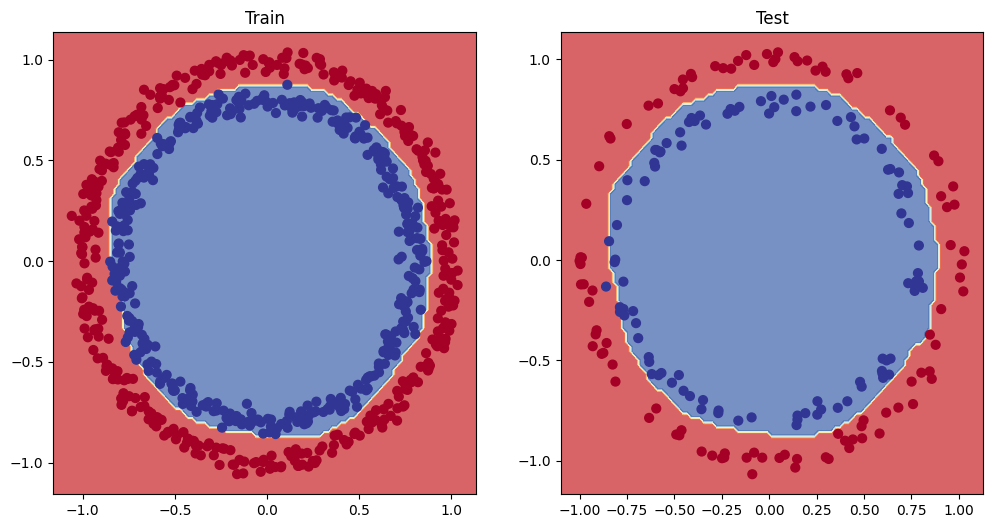

In [242]:
#plot decision boundary
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model1, X_test, y_test)

# Multi-class Classification

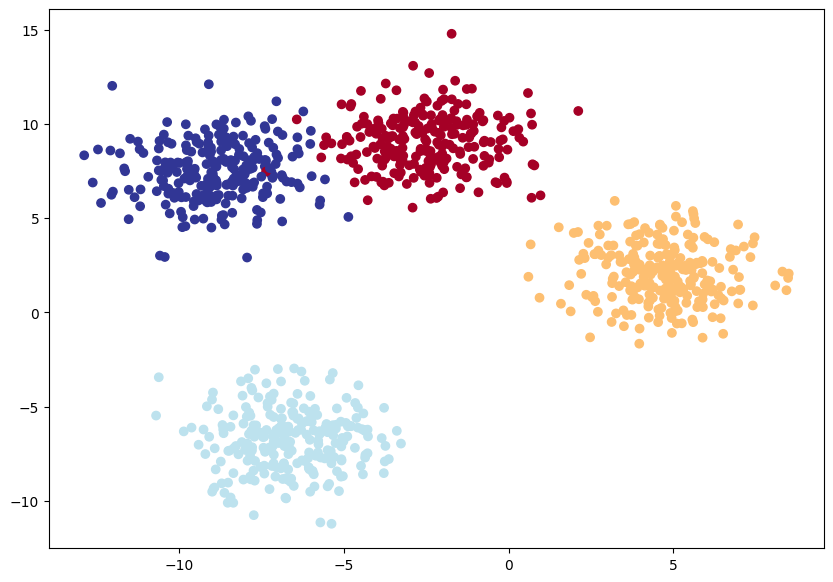

In [243]:
from sklearn.datasets import make_blobs

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_train, X_test, y_train, y_test = train_test_split(X_blob,
                                                    y_blob,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)

plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1],c=y_blob, cmap=plt.cm.RdYlBu)

In [244]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### building multi-class model

In [245]:
X_blob.shape

torch.Size([1000, 2])

In [246]:
y_blob.unique()

tensor([0, 1, 2, 3])

In [247]:
multiclassmodel = nn.Sequential(
    nn.Linear(2,8),
    nn.ReLU(),
    nn.Linear(8,8),
    nn.ReLU(),
    nn.Linear(8,4)
)

In [248]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(params=multiclassmodel.parameters(),
                      lr = 0.1)
# learning rate is a hyperparameter, we can fine tune it according to the model

In [249]:
multiclassmodel.eval()
with torch.inference_mode():
  y_logits = multiclassmodel(X_test)

In [250]:
y_logits[:5]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])

In [251]:
y_pred_probs = torch.softmax(y_logits,dim=1)
y_pred_probs[:5]

tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])

In [252]:
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

## Training and Testing loop

In [259]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)


device = "cuda" if torch.cuda.is_available() else "cpu"
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


epochs = 100

for epoch in range(epochs):
  multiclassmodel.train()
  y_train_logits = multiclassmodel(X_train)
  y_train_softmax = torch.softmax(y_train_logits,dim=1)
  y_train_pred = torch.argmax(y_train_softmax, dim=1)
  loss = loss_fn(y_train_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_train_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  multiclassmodel.eval()
  with torch.inference_mode():
    test_logits = multiclassmodel(X_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                          y_pred=test_pred)

    if epoch%10==0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc:{acc:.2f}% | Test Loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.02657, Acc:99.25% | Test Loss: 0.01651, Test acc: 99.50%
Epoch: 10 | Loss: 0.02634, Acc:99.25% | Test Loss: 0.01621, Test acc: 99.50%
Epoch: 20 | Loss: 0.02613, Acc:99.25% | Test Loss: 0.01593, Test acc: 99.50%
Epoch: 30 | Loss: 0.02595, Acc:99.25% | Test Loss: 0.01568, Test acc: 99.50%
Epoch: 40 | Loss: 0.02578, Acc:99.25% | Test Loss: 0.01545, Test acc: 99.50%
Epoch: 50 | Loss: 0.02563, Acc:99.25% | Test Loss: 0.01524, Test acc: 99.50%
Epoch: 60 | Loss: 0.02549, Acc:99.25% | Test Loss: 0.01504, Test acc: 99.50%
Epoch: 70 | Loss: 0.02536, Acc:99.25% | Test Loss: 0.01486, Test acc: 99.50%
Epoch: 80 | Loss: 0.02524, Acc:99.25% | Test Loss: 0.01470, Test acc: 99.50%
Epoch: 90 | Loss: 0.02513, Acc:99.25% | Test Loss: 0.01454, Test acc: 99.50%


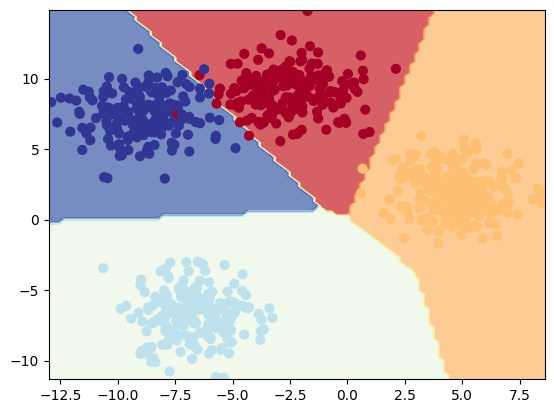

In [263]:
plot_decision_boundary(multiclassmodel, X_train, y_train)

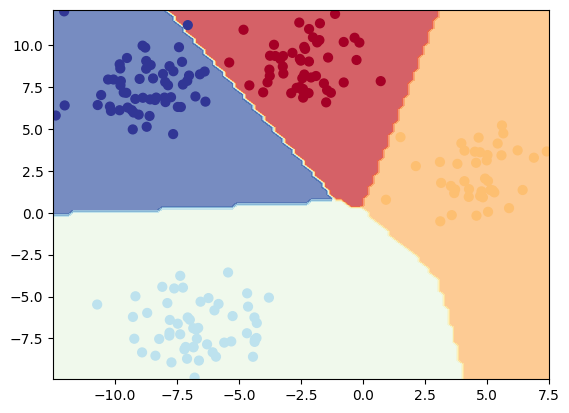

In [264]:
plot_decision_boundary(multiclassmodel, X_test, y_test)

## Classification metrics

* accuracy
* precision
* recall
* f1-score
* confusion matrix
* classification report